# Visualization of different number on goroutines

In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from json import load
from operator import itemgetter

%matplotlib inline
from matplotlib import pyplot as plt

### Load dataset to visualize

In [10]:
file_name = 'report.json'
with open(file_name, 'r') as file:
    data = load(file)

### Convert json to pandas DataFrame

In [11]:
reconstructed_data = dict()
for key in data['reports'][0].keys():
    reconstructed_data[key] = list(map(itemgetter(key), data['reports']))

In [12]:
df = pd.DataFrame(reconstructed_data)
df.head()

elements  consequential  goroutines  concurrent
0   1000000       98051567           1    98170217
1   1000000       99039537           1    97941342
2   1000000      104454908           1   102074149
3   1000000       99485894           1    99022749
4   1000000       98722727           1   100825288

In [13]:
df_mean = df.groupby('goroutines') \
    [['consequential', 'concurrent']] \
    .aggregate('mean').reset_index()
df_mean.head()

goroutines  consequential  concurrent
0           1     99330317.2  99054935.1
1           2     99611164.6  49636616.4
2           3     99147808.0  33405076.5
3           4     99995525.5  29262110.9
4           5     99924184.7  31909166.7

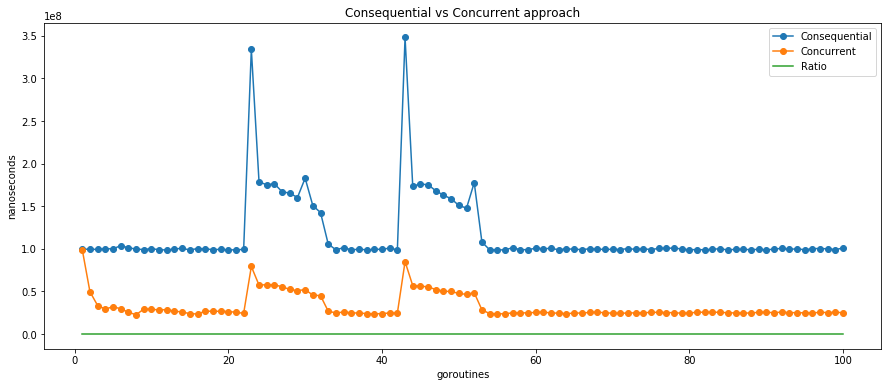

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(df_mean['goroutines'], df_mean['consequential'], label='Consequential', marker='o')
plt.plot(df_mean['goroutines'], df_mean['concurrent'], label='Concurrent', marker='o')
plt.xlabel('goroutines')
plt.ylabel('nanoseconds')
plt.title('Consequential vs Concurrent approach')
plt.legend();

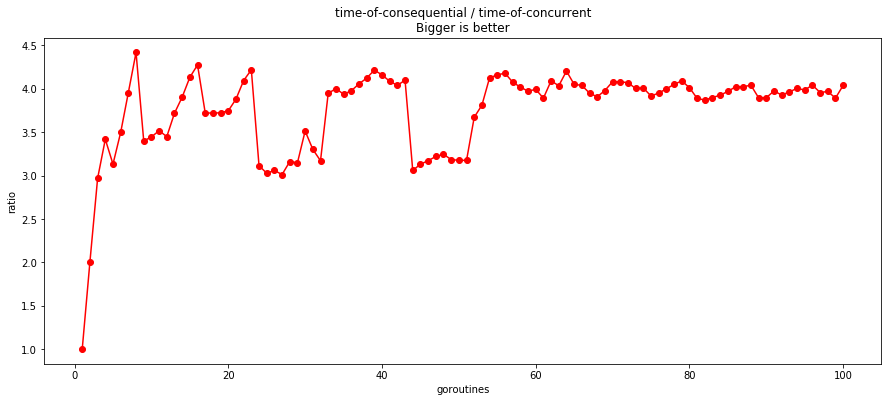

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(df_mean['goroutines'], df_mean['consequential'] / df_mean['concurrent'], 
         label='Ratio', marker='o', color='red')
plt.title('time-of-consequential / time-of-concurrent\nBigger is better')
plt.xlabel('goroutines')
plt.ylabel('ratio');